# Data Preprocessing

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
train_data = pd.read_csv("./raw_data/data_train.csv")

In [4]:
train_data.shape #(12,229,978, 71)
train_data.head()

,ind_recommended,activation,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,customer_spend_03,customer_merchant_02,customer_merchant_01,customer_spend_04,customer_spend_05,customer_spend_06,customer_spend_07,merchant_spend_01,merchant_spend_02,merchant_spend_03,merchant_spend_04,merchant_spend_05,merchant_spend_06,merchant_spend_07,merchant_spend_08,merchant_profile_01,customer_merchant_03,customer_profile_01,customer_profile_02,customer_digital_activity_05,customer_spend_13,customer_digital_activity_06,customer_spend_14,customer_digital_activity_07,customer_digital_activity_08,customer_digital_activity_09,customer_digital_activity_10,customer_digital_activity_11,customer_digital_activity_12,customer_digital_activity_13,customer_digital_activity_14,customer_digital_activity_15,customer_spend_15,customer_digital_activity_16,customer_spend_16,customer_spend_17,customer_digital_activity_17,customer_digital_activity_03,merchant_spend_11,customer_digital_activity_18,customer_digital_activity_19,distance_01,customer_digital_activity_20,distance_02,distance_03,customer_spend_18,customer_spend_19,customer_digital_activity_21,customer_digital_activity_22,distance_04,merchant_profile_02,merchant_spend_09,merchant_profile_03,customer_digital_activity_01,merchant_spend_10,customer_profile_03,customer_digital_activity_02,customer_profile_04,distance_05,customer,merchant
0,0,0,NaN,107.215862,26.686594,74.0,3682.75,138.0,111.0,14.0,133.0,NaN,NaN,4477.0,29719.09,782.0,306.0,29.781042,43.0,0.0,0.0,0.0,32.0,1429.49,48.0,101.0,0.905510,5466.06,1700.00,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,10.0,0.307692,0.444444,1.219756,13.0,0.714531,20.85,0.017921,0.000468,4.000000,0.157534,49466.0,65923.0,0.000000,29.180,58.434969,32.500000,86.0,15.856826,168972,152285
1,0,0,NaN,35.552000,50.928261,3.0,1171.35,23.0,17.0,2.0,8.0,NaN,NaN,17577.0,1051.40,52.0,43.0,34.643313,97.0,0.0,0.0,0.0,15.0,5646.86,163.0,403.0,0.961583,781.56,597.41,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,3.808333,NaN,6.998555,1.0,0.871597,24.81,NaN,NaN,3.808333,0.084416,3638.0,7801.0,0.419355,28.465,5.392089,7.000000,125.0,6.998555,212404,39032
2,0,0,NaN,31.623103,48.837872,19.0,2295.38,47.0,42.0,11.0,62.0,NaN,NaN,49494.0,4695.22,196.0,136.0,1731.000000,2.0,1731.0,2.0,2.0,8.0,3462.00,2.0,406.0,0.327672,1457.84,1200.00,NaN,1.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.129853,13.5,0.076536,32.26,0.000000,0.000000,NaN,0.240000,3912.0,12868.0,0.836364,421.500,33.780445,0.000000,180.0,1.753009,225178,7439
3,0,0,NaN,112.277391,NaN,NaN,NaN,NaN,NaN,16.0,33.0,NaN,NaN,NaN,5190.94,167.0,112.0,54.800000,4.0,0.0,0.0,0.0,62.0,274.00,5.0,326.0,0.769936,351.22,500.00,1.0,NaN,4.0,NaN,NaN,NaN,NaN,20.0,19.0,19.0,13.0,19.0,7.0,NaN,3.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,2.000000,0.187500,28919.0,23553.0,0.952381,50.000,37.340085,28.666667,134.0,9.000063,183948,485069
4,1,0,NaN,448.427273,NaN,NaN,NaN,NaN,NaN,5.0,8.0,NaN,NaN,NaN,11713.96,33.0,28.0,166.000000,1.0,0.0,0.0,0.0,74.0,166.00,1.0,326.0,NaN,831.67,99.00,1.0,NaN,2.0,NaN,NaN,NaN,NaN,15.0,15.0,15.0,7.0,15.0,4.0,NaN,3.0,NaN,NaN,10.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,6.500000,0.428571,1086.0,308.0,0.754386,69.509,77.794164,15.000000,114.0,1.767939,210107,536004


In [3]:
feature_dictionary = pd.read_csv("./raw_data/feature_dictionary_reordered.csv")

In [5]:
feature_dictionary.head()

,Feature Name,Feature description,Feature Type
0,customer,Customer ID,numeric
1,merchant,Merchant ID,numeric
2,ind_recommended,Indicator Recommended. 1 means Merchant was re...,numeric
3,activation,Activation Indicator (Dependent Variable),numeric
4,customer_profile_01,Customer_Profile_variable_01,numeric


In [18]:
# Reordered dataframe: by column names (DEPRECATED)
cm_profile = train_data.filter(like="customer_profile").sort_index(axis=1)
cm_spend = train_data.filter(like="customer_spend").sort_index(axis=1)
cm_industry_spend = train_data.filter(like="customer_industry_spend").sort_index(axis=1)
cm_digital_activity = train_data.filter(like="customer_digital_activity").sort_index(axis=1)
cm_mr = train_data.filter(like="customer_merchant").sort_index(axis=1)
distance = train_data.filter(like="distance").sort_index(axis=1)
mr_profile = train_data.filter(like="merchant_profile").sort_index(axis=1) #merchant_profile_01 is a categorical variable
mr_spend = train_data.filter(like="merchant_spend").sort_index(axis=1)
ids_labels = train_data[["customer", "merchant", "ind_recommended", "activation"]]
train_data = pd.concat([ids_labels, cm_profile, cm_spend, cm_industry_spend, cm_digital_activity, cm_mr, distance, mr_profile, mr_spend], axis=1)

In [8]:
# Sort training data
feature_names = feature_dictionary["Feature Name"].values
train_data = train_data[feature_names]

In [9]:
train_data.head()

,customer,merchant,ind_recommended,activation,customer_profile_01,customer_profile_02,customer_profile_03,customer_profile_04,customer_spend_01,customer_spend_02,customer_spend_03,customer_spend_04,customer_spend_05,customer_spend_06,customer_spend_07,customer_spend_13,customer_spend_14,customer_spend_15,customer_spend_16,customer_spend_17,customer_spend_18,customer_spend_19,customer_digital_activity_01,customer_digital_activity_02,customer_digital_activity_03,customer_digital_activity_04,customer_digital_activity_05,customer_digital_activity_06,customer_digital_activity_07,customer_digital_activity_08,customer_digital_activity_09,customer_digital_activity_10,customer_digital_activity_11,customer_digital_activity_12,customer_digital_activity_13,customer_digital_activity_14,customer_digital_activity_15,customer_digital_activity_16,customer_digital_activity_17,customer_digital_activity_18,customer_digital_activity_19,customer_digital_activity_20,customer_digital_activity_21,customer_digital_activity_22,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_merchant_01,customer_merchant_02,customer_merchant_03,distance_01,distance_02,distance_03,distance_04,distance_05,merchant_profile_01,merchant_profile_02,merchant_profile_03,merchant_spend_01,merchant_spend_02,merchant_spend_03,merchant_spend_04,merchant_spend_05,merchant_spend_06,merchant_spend_07,merchant_spend_08,merchant_spend_09,merchant_spend_10,merchant_spend_11
0,168972,152285,0,0,5466.06,1700.00,58.434969,86.0,107.215862,14.0,133.0,4477.0,29719.09,782.0,306.0,3.0,4.0,NaN,1.0,NaN,0.714531,20.85,0.000000,32.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.444444,0.017921,0.000468,26.686594,74.0,3682.75,138.0,111.0,NaN,NaN,0.905510,0.307692,1.219756,13.0,4.000000,15.856826,101.0,0.157534,65923.0,29.781042,43.0,0.0,0.0,0.0,32.0,1429.49,48.0,49466.0,29.180,NaN
1,212404,39032,0,0,781.56,597.41,5.392089,125.0,35.552000,2.0,8.0,17577.0,1051.40,52.0,43.0,1.0,2.0,NaN,1.0,NaN,0.871597,24.81,0.419355,7.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.928261,3.0,1171.35,23.0,17.0,NaN,NaN,0.961583,3.808333,6.998555,1.0,3.808333,6.998555,403.0,0.084416,7801.0,34.643313,97.0,0.0,0.0,0.0,15.0,5646.86,163.0,3638.0,28.465,NaN
2,225178,7439,0,0,1457.84,1200.00,33.780445,180.0,31.623103,11.0,62.0,49494.0,4695.22,196.0,136.0,1.0,24.0,2.0,2.0,3.0,0.076536,32.26,0.836364,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,48.837872,19.0,2295.38,47.0,42.0,NaN,NaN,0.327672,NaN,0.129853,13.5,NaN,1.753009,406.0,0.240000,12868.0,1731.000000,2.0,1731.0,2.0,2.0,8.0,3462.00,2.0,3912.0,421.500,NaN
3,183948,485069,0,0,351.22,500.00,37.340085,134.0,112.277391,16.0,33.0,NaN,5190.94,167.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.952381,28.666667,0.0,NaN,1.0,4.0,NaN,NaN,NaN,20.0,19.0,19.0,13.0,19.0,7.0,3.0,0.0,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.769936,NaN,NaN,NaN,2.000000,9.000063,326.0,0.187500,23553.0,54.800000,4.0,0.0,0.0,0.0,62.0,274.00,5.0,28919.0,50.000,NaN
4,210107,536004,1,0,831.67,99.00,77.794164,114.0,448.427273,5.0,8.0,NaN,11713.96,33.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.754386,15.000000,0.0,NaN,1.0,2.0,NaN,NaN,NaN,15.0,15.0,15.0,7.0,15.0,4.0,3.0,10.0,NaN,1.0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.500000,1.767939,326.0,0.428571,308.0,166.000000,1.0,0.0,0.0,0.0,74.0,166.00,1.0,1086.0,69.509,NaN


In [10]:
# Reordered dataframe: by customer id
train_data_cmid = train_data.sort_values(by=["customer"])

# Reordered dataframe: by merchant id
train_data_mrid = train_data.sort_values(by=["merchant"])

In [49]:
train_data_cmid.head(60)

,customer,merchant,ind_recommended,activation,customer_profile_01,customer_profile_02,customer_profile_03,customer_profile_04,customer_spend_01,customer_spend_02,customer_spend_03,customer_spend_04,customer_spend_05,customer_spend_06,customer_spend_07,customer_spend_13,customer_spend_14,customer_spend_15,customer_spend_16,customer_spend_17,customer_spend_18,customer_spend_19,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_digital_activity_01,customer_digital_activity_02,customer_digital_activity_03,customer_digital_activity_04,customer_digital_activity_05,customer_digital_activity_06,customer_digital_activity_07,customer_digital_activity_08,customer_digital_activity_09,customer_digital_activity_10,customer_digital_activity_11,customer_digital_activity_12,customer_digital_activity_13,customer_digital_activity_14,customer_digital_activity_15,customer_digital_activity_16,customer_digital_activity_17,customer_digital_activity_18,customer_digital_activity_19,customer_digital_activity_20,customer_digital_activity_21,customer_digital_activity_22,customer_merchant_01,customer_merchant_02,customer_merchant_03,distance_01,distance_02,distance_03,distance_04,distance_05,merchant_profile_01,merchant_profile_02,merchant_profile_03,merchant_spend_01,merchant_spend_02,merchant_spend_03,merchant_spend_04,merchant_spend_05,merchant_spend_06,merchant_spend_07,merchant_spend_08,merchant_spend_09,merchant_spend_10,merchant_spend_11
4011268,0,437672,0,0,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,33.0,1.0,1.0,4.0,0.471619,34.730,56.474309,50.0,17168.19,304.0,229.0,1.000000,4.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,0.987552,0.015306,0.004752,NaN,NaN,0.915199,1.000000,0.081735,1.0,1.000000,0.081735,101.0,0.389223,5809.0,83.857933,564.0,0.000000,0.0,0.0,2.0,54759.23,653.0,7789.0,73.640000,NaN
11762549,0,537916,0,0,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,16.0,1.0,1.0,4.0,0.339132,34.730,56.474309,50.0,17168.19,304.0,229.0,1.000000,4.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,0.069869,0.005304,0.000595,NaN,NaN,0.890552,1.000000,0.128216,1.0,1.000000,0.128216,101.0,0.559633,664.0,118.280882,671.0,0.000000,0.0,0.0,1.0,100538.75,850.0,3767.0,102.408519,NaN
5616754,0,294393,0,0,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,16.0,1.0,1.0,4.0,0.887291,34.730,56.474309,50.0,17168.19,304.0,229.0,1.000000,4.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,0.842447,5.687500,0.181966,1.0,5.687500,0.181966,101.0,0.351039,9282.0,74.936134,173.0,0.000000,0.0,0.0,10.0,17834.80,238.0,28229.0,39.141591,NaN
2620353,0,552762,0,0,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,19.0,1.0,1.0,4.0,1.057874,34.730,56.474309,50.0,17168.19,304.0,229.0,1.000000,4.833333,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,0.490000,0.037172,0.001231,NaN,NaN,0.883222,1.000000,0.191539,1.0,1.000000,0.191539,101.0,0.336029,10985.0,40.419133,256.0,22.948633,135.0,166.0,9.0,12125.74,300.0,40152.0,32.830000,NaN
12224583,0,525036,0,1,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,43.0,1.0,1.0,4.0,1.251532,34.730,56.474309,50.0,17168.19,304.0,229.0,1.000000,4.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,0.911327,2.104167,0.091027,1.0,2.104167,0.091027,101.0,0.274652,22887.0,43.363227,481.0,17.202818,231.0,369.0,4.0,28619.73,660.0,53400.0,27.750000,NaN
5193924,0,490615,0,0,1837.92,1728.77,99.714867,448.0,102.508261,18.0,92.0,4128.0,42868.39,909.0,318.0,1.0,NaN,1.0,1.0,4.0,0.742947,34.730,56.474309,50.0,17168.19,304.0,229.0,1.000000,4.833333,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN

In [51]:
train_data_mrid.drop(train_data_mrid.iloc[:, 4:52], axis=1).head(40)

,customer,merchant,ind_recommended,activation,distance_01,distance_02,distance_03,distance_04,distance_05,merchant_profile_01,merchant_profile_02,merchant_profile_03,merchant_spend_01,merchant_spend_02,merchant_spend_03,merchant_spend_04,merchant_spend_05,merchant_spend_06,merchant_spend_07,merchant_spend_08,merchant_spend_09,merchant_spend_10,merchant_spend_11
244947,53344,0,0,0,NaN,2.865887,1.0,NaN,2.865887,101.0,NaN,NaN,117.865342,62.0,0.0,0.0,0.0,13.0,8604.17,73.0,NaN,NaN,NaN
8192800,434018,0,0,0,NaN,0.503180,4.0,NaN,2.012719,101.0,NaN,NaN,121.203333,63.0,0.0,0.0,0.0,11.0,9090.25,75.0,NaN,NaN,NaN
6377565,74103,0,0,0,NaN,NaN,NaN,NaN,4.526856,101.0,NaN,NaN,118.339718,60.0,0.0,0.0,0.0,13.0,8402.12,71.0,NaN,NaN,NaN
9542236,208282,0,0,0,NaN,2.012719,1.0,NaN,2.012719,101.0,NaN,NaN,105.593472,58.0,0.0,0.0,0.0,13.0,7602.73,72.0,NaN,NaN,NaN
11251501,96378,0,0,0,NaN,2.012719,1.0,NaN,2.012719,101.0,NaN,NaN,106.537971,54.0,0.0,0.0,0.0,13.0,7351.12,69.0,NaN,NaN,NaN
11323755,1005,0,0,0,NaN,2.636383,1.0,NaN,2.636383,101.0,NaN,NaN,119.802169,75.0,0.0,0.0,0.0,11.0,9943.58,83.0,NaN,NaN,NaN
7988215,21097,0,0,0,NaN,NaN,NaN,NaN,4.526856,101.0,NaN,NaN,103.413375,68.0,0.0,0.0,0.0,11.0,8273.07,80.0,NaN,NaN,NaN
11599166,444491,0,0,0,NaN,2.865887,1.0,NaN,2.865887,101.0,NaN,NaN,102.920000,53.0,0.0,0.0,0.0,13.0,6792.72,66.0,NaN,NaN,NaN
134908,143190,0,0,0,NaN,NaN,NaN,NaN,2.012719,101.0,NaN,NaN,110.701127,58.0,0.0,0.0,0.0,13.0,7859.78,71.0,NaN,NaN,NaN
6958504,273381,1,0,0,NaN,NaN,NaN,NaN,3.759386,406.0,NaN,NaN,24.152000,5.0,0.0,0.0,0.0,79.0,120.76,5.0,NaN,NaN,NaN


In [11]:
train_data.customer.nunique() # 462584
train_data.merchant.nunique() # 591973

591973

# Check Row NaNs 

In [61]:
# Count NaN values
row_nan_counts = train_data.isna().sum(axis=1)
row_nan_counts = row_nan_counts.to_frame(name="NaN counts")
row_nan_counts.head(20)

,NaN counts
0,21
1,24
2,22
3,26
4,26
5,25
6,48
7,18
8,22
9,29


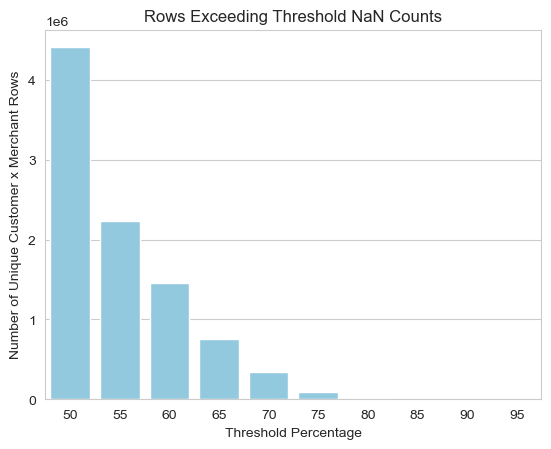

In [67]:
# Plot histogram counts of rows where NaN counts exceed thresholds
num_cols = train_data.shape[1]
# List of thresholds
thresholds = {
    50: np.ceil(num_rows*0.5),
    55: np.ceil(num_rows*0.5),
    60: np.ceil(num_rows*0.6),
    65: np.ceil(num_rows*0.5),
    70: np.ceil(num_rows*0.7),
    75: np.ceil(num_rows*0.5),
    80: np.ceil(num_rows*0.8),
    85: np.ceil(num_rows*0.5),
    90: np.ceil(num_rows*0.9),
    95: np.ceil(num_rows*0.5)
}

# Initialize dictionary to store counts exceeding each threshold
thresholded_counts = {threshold: 0 for threshold in thresholds}
# Iterate through each feature's NaN count
for index, row in row_nan_counts.iterrows():
    nan_count = row['NaN counts']

    # Calculate percentage of NaNs for the current feature
    nan_percentage = (nan_count / num_cols) * 100

    # Check if the nan_percentage exceeds any threshold
    for threshold, threshold_count in thresholds.items():
        if nan_percentage > threshold:
            thresholded_counts[threshold] += 1

# Convert dictionary to DataFrame for easier plotting with seaborn
thresholded_counts_df = pd.DataFrame({
    'Threshold': list(thresholded_counts.keys()),
    'Count': list(thresholded_counts.values())
})

# Plotting histogram using seaborn
sns.set_style("whitegrid")  # Set style to "whitegrid" for background grid lines
sns.barplot(x='Threshold', y='Count', data=thresholded_counts_df, color='skyblue')
plt.xlabel('Threshold Percentage')
plt.ylabel('Number of Unique Customer x Merchant Rows')
plt.title('Rows Exceeding Threshold NaN Counts')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Drop Rows 

In [68]:
# Drop rows where NaN counts exceed selected threshold of 55%
filt_rows = train_data[(row_nan_counts["NaN counts"]/num_cols*100)<=55]
filt_rows.shape # 9,996,242 rows

# Check Column NaNs

In [70]:
# Count NaN values
col_nan_counts = filt_rows.isna().sum()
col_nan_counts = col_nan_counts.to_frame(name="NaN counts").reset_index()
col_nan_counts = col_nan_counts.rename(columns={"index": "Feature names"})
col_nan_counts.head(20)

,Feature names,NaN counts
0,customer,0
1,merchant,0
2,ind_recommended,0
3,activation,0
4,customer_profile_01,478
5,customer_profile_02,478
6,customer_profile_03,37279
7,customer_profile_04,2263
8,customer_spend_01,888724
9,customer_spend_02,888724


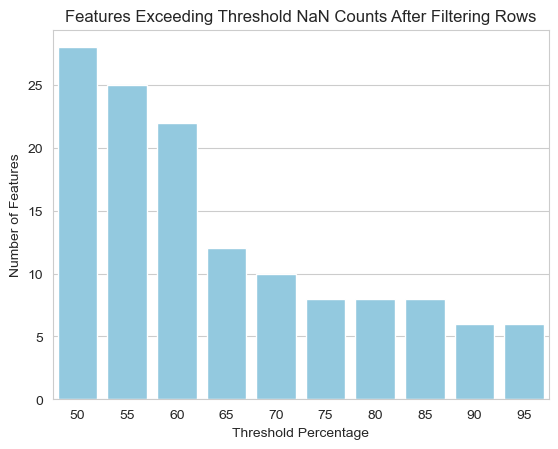

In [72]:
# Plot histogram counts of the columns where NaN counts are above thresholds
num_rows = filt_rows.shape[0]
# List of thresholds
thresholds = {
    50: np.ceil(num_rows*0.5),
    55: np.ceil(num_rows*0.5),
    60: np.ceil(num_rows*0.6),
    65: np.ceil(num_rows*0.5),
    70: np.ceil(num_rows*0.7),
    75: np.ceil(num_rows*0.5),
    80: np.ceil(num_rows*0.8),
    85: np.ceil(num_rows*0.5),
    90: np.ceil(num_rows*0.9),
    95: np.ceil(num_rows*0.5)
}
# Initialize dictionary to store counts exceeding each threshold
thresholded_counts = {threshold: 0 for threshold in thresholds}
# Iterate through each feature's NaN count
for index, row in col_nan_counts.iterrows():
    feature_name = row['Feature names']
    nan_count = row['NaN counts']

    # Calculate percentage of NaNs for the current feature
    nan_percentage = (nan_count / num_rows) * 100

    # Check if the nan_percentage exceeds any threshold
    for threshold, threshold_count in thresholds.items():
        if nan_percentage > threshold:
            thresholded_counts[threshold] += 1

# Convert dictionary to DataFrame for easier plotting with seaborn
thresholded_counts_df = pd.DataFrame({
    'Threshold': list(thresholded_counts.keys()),
    'Count': list(thresholded_counts.values())
})

# Plotting histogram using seaborn
sns.set_style("whitegrid")  # Set style to "whitegrid" for background grid lines
sns.barplot(x='Threshold', y='Count', data=thresholded_counts_df, color='skyblue')
plt.xlabel('Threshold Percentage')
plt.ylabel('Number of Features')
plt.title('Features Exceeding Threshold NaN Counts After Filtering Rows')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Drop Columns

In [81]:
# Drop columns where NaN counts exceed selected threshold of 65%
filt_train_data = filt_rows.loc[:,list((col_nan_counts["NaN counts"]/num_rows*100)<=65)]
filt_train_data.shape # 59 columns

(9996242, 59)

# Damian's Scribbles

In [36]:
nan_counts.to_csv("./preprocessed_data/NaN_counts.csv", index=False)

In [ ]:
# Preprocessing: NA values
# Q1: Does imputation make sense?
# Q2: Imputation of mean across the same customer or the same merchant?

# Distances

